In [1]:
from LUNA_train_unet import *
from cancer_utils import *
import glob
import dicom
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
working_path='/mnt/kaggle_lung_cancer/luna_tut_output/'

In [3]:
print('-'*30)
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train = np.load(working_path+"trainImages.npy").astype(np.float32)
imgs_mask_train = np.load(working_path+"trainMasks.npy").astype(np.float32)

imgs_test = np.load(working_path+"testImages.npy").astype(np.float32)
imgs_mask_test_true = np.load(working_path+"testMasks.npy").astype(np.float32)

mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean  # images should already be standardized, but just in case
imgs_train /= std

print('-'*30)
print('Creating and compiling model...')
print('-'*30)
model = get_unet()
# Saving weights to unet.hdf5 at checkpoints
model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss', save_best_only=True)


------------------------------
Loading and preprocessing train data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------


In [5]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 1, 512, 512)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 32, 512, 512)  320         input_1[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 512, 512)  9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 256, 256)  0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [69]:
imgs_test.shape

(645, 1, 512, 512)

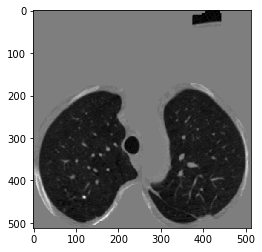

In [57]:
plt.imshow(imgs_train[0][0],cmap='gray')

In [58]:
model.load_weights('/mnt/kaggle_lung_cancer/DSB3Tutorial/unet.hdf5')


In [71]:
cd .

/home/ubuntu/nbs/kaggle_ds_bowl_17


In [ ]:
from keras_tqdm import TQDMNotebookCallback
parms = {'verbose': 0, 'callbacks': [TQDMNotebookCallback(leave_inner=True),model_checkpoint]}
#
# Should we load existing weights? 
# Set argument for call to train_and_predict to true at end of script
#if use_existing:
model.load_weights('./unet.hdf5')

# 
# The final results for this tutorial were produced using a multi-GPU
# machine using TitanX's.
# For a home GPU computation benchmark, on my home set up with a GTX970 
# I was able to run 20 epochs with a training set size of 320 and 
# batch size of 2 in about an hour. I started getting reseasonable masks 
# after about 3 hours of training. 
#
print('-'*30)
print('Fitting model...')
print('-'*30)
model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=20, shuffle=True,
          validation_data=(imgs_test,imgs_mask_test_true), **parms)



In [66]:
imgs_mask_train.shape

(2580, 1, 512, 512)

In [58]:
for i in range(imgs_mask_test.shape[0]):
    print(np.sum(imgs_mask_test[i]))

0.000358185
0.00186652
0.00011511
0.000275539
0.000461537
0.00103896
0.00076452
0.000509403
0.00125668
0.000270159
0.00127201
0.0128425
0.000111511
0.0318353
0.000357007
0.000814729
0.000351674
0.000153217
0.000710965
6.9657e-05
0.00124508
5.60529e-05
0.00146466
0.00444175
0.00165826
0.000170068
0.00727122
0.0138104
0.00371892
0.000497516
5.54337e-05
7.5215e-05
0.000137586
0.000855493
0.000475435
0.00294992
0.00521304
0.000273019
0.00250985
0.00786077
0.000492615
4.68221e-05
0.0123546
0.00310516
0.000829549
0.000794144
0.000153115
0.000255984
0.000300154
0.00127649
7.62554e-05
0.00406008
0.00250757
0.00467805
6.58609e-05
0.00099006
9.28467e-05
0.0015529
5.57438e-05
0.000256202
6.37244e-05
0.0065514
0.000134197
0.000746422
0.000100114
0.00340756
0.00361163


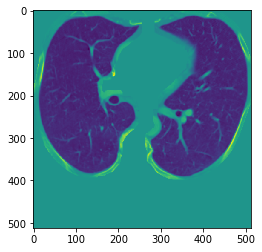

In [89]:
plt.imshow(imgs_test[10][0])

In [72]:
# loading best weights from training session
print('-'*30)
print('Loading saved weights...')
print('-'*30)
model.load_weights('./unet.hdf5')

print('-'*30)
print('Predicting masks on test data...')
print('-'*30)
num_test = len(imgs_test)
imgs_mask_test = np.ndarray([num_test,1,512,512],dtype=np.float32)
for i in range(num_test):
    imgs_mask_test[i] = model.predict([imgs_test[i:i+1]], verbose=0)[0]
np.save('masksTestPredicted.npy', imgs_mask_test)
mean = 0.0

for i in range(num_test):
    mean+=dice_coef_np(imgs_mask_test_true[i,0], imgs_mask_test[i,0])
mean/=num_test
print("Mean Dice Coeff : ",mean)

------------------------------
Loading saved weights...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
Mean Dice Coeff :  0.347770976998


In [75]:
#try
for i in range(num_test):
    print(i,dice_coef_np(imgs_mask_test_true[i,0], imgs_mask_test[i,0]))

0 0.470140849886
1 0.263536791945
2 0.363363045971
3 0.439442179379
4 0.0347580228033
5 0.41532703123
6 0.999999953446
7 0.315186310153
8 0.619980933347
9 0.0747203818223
10 0.364519144885
11 0.443652331039
12 0.0794523647318
13 0.185613968629
14 0.0866341713615
15 0.575705874876
16 0.549499518731
17 0.29934306311
18 0.100769918636
19 0.149491246236
20 0.148329738643
21 0.390621770957
22 0.479844941464
23 0.25036093473
24 0.210123796228
25 0.217463297692
26 0.274529968593
27 0.449483616229
28 0.484784739796
29 0.597521399036
30 0.253026445078
31 0.107126408786
32 0.347948488774
33 0.65242391399
34 0.999999993566
35 0.497924515176
36 0.387214448311
37 0.0897209261095
38 0.284552838358
39 0.135982877126
40 0.683933248371
41 0.418210730226
42 0.0328494666774
43 0.229012090842
44 0.410219174567
45 0.2560711604
46 0.359115543858
47 0.283159993109
48 0.269337534198
49 0.279318974599
50 0.0400098992999
51 0.0793003441091
52 0.441118150307
53 0.0588072785403
54 0.504981332757
55 0.272856925669

[  0.00000000e+00   2.45038209e-05   3.49156981e-05   3.77879405e-05
   4.11987312e-05   6.70489171e-05   6.86645508e-05   9.19117665e-05
   1.03400736e-04   1.50044754e-04   2.27535478e-04   2.97546387e-04
   3.12206801e-04   3.25520843e-04   3.29619768e-04   3.35184741e-04
   3.39552935e-04   3.51460767e-04   3.51640279e-04   3.61334096e-04
   3.81439808e-04   4.48069855e-04   6.04098430e-04   7.04656879e-04
   7.78168323e-04   8.07848177e-04   8.23166803e-04   8.29150609e-04
   8.64574977e-04   9.36321157e-04   9.88979009e-04   1.08238671e-03
   1.17142627e-03   1.36123353e-03   1.46636961e-03   1.47875620e-03
   1.54625392e-03   1.55056221e-03   1.61231542e-03   1.61943620e-03
   1.68504904e-03   1.72762398e-03   1.74449850e-03   1.79877190e-03
   1.86887255e-03   2.04231404e-03   2.10969220e-03   2.21213535e-03
   2.23409617e-03   2.29779421e-03   2.30697938e-03   2.31930590e-03
   2.38644471e-03   2.41049961e-03   2.51677260e-03   2.53466447e-03
   2.60455557e-03   2.84600351e-03

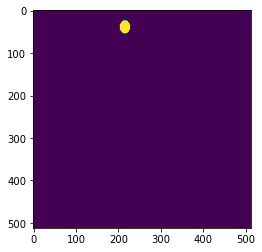

In [94]:
i=643
print(np.unique(imgs_mask_test_true[i,0]))
plt.imshow(imgs_mask_test_true[i,0])

In [43]:
np.sum(model.predict(np.expand_dims(imgs_train[0],0)))

2.6359951e-16

In [44]:
dice_coef_np(imgs_mask_train[0][0],model.predict(np.expand_dims(imgs_train[0],0)))

0.49655253080483214

In [ ]:
dice_coef_np(imgs_mask_test_true[i,0], imgs_mask_test[i,0])

## make preds for stage1

In [13]:
e=glob.glob('/mnt/kaggle_lung_cancer/stage1/*/*.*')

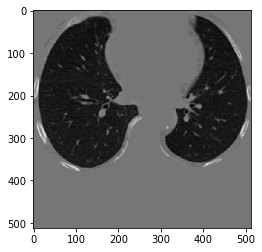

In [34]:
plt.imshow(img,cmap='gray')

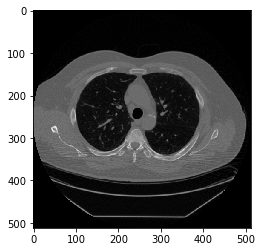

In [26]:
%matplotlib inline
dc = dicom.read_file(e[45])
img = dc.pixel_array
img[img == -2000] = 0
plt.imshow(img,cmap='gray')


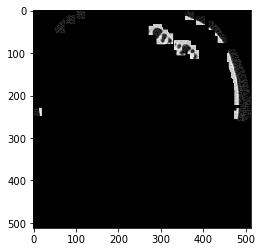

0.0635114 0
0


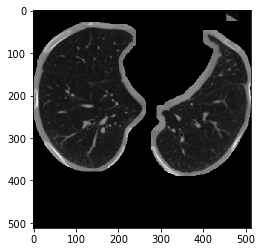

0.00880087 1


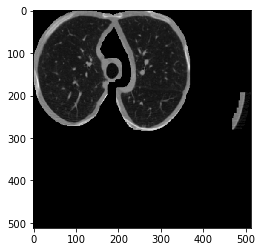

0.0119262 2


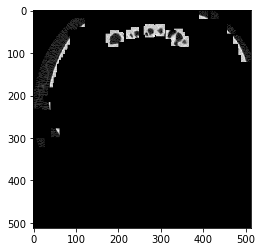

0.0625636 3


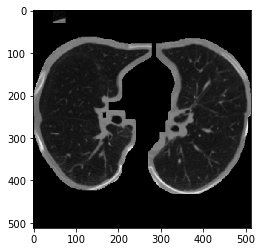

0.00596766 4


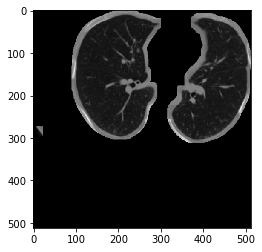

0.019934 5


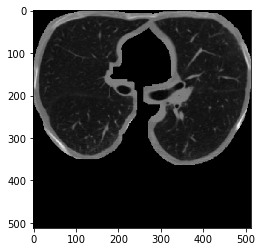

0.00370038 6


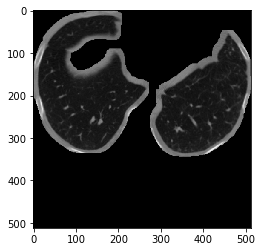

0.00789922 7


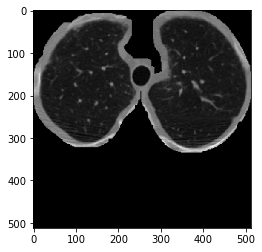

0.00630843 8


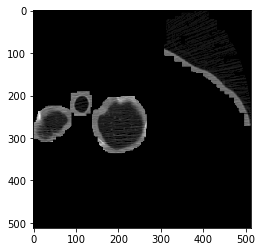

0.0562617 9


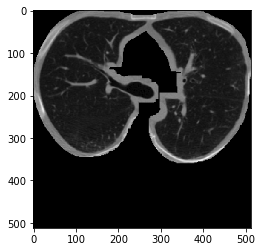

0.00346095 10


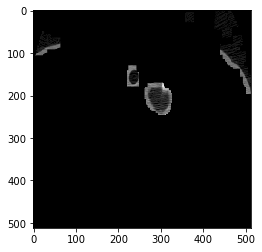

0.0569195 11


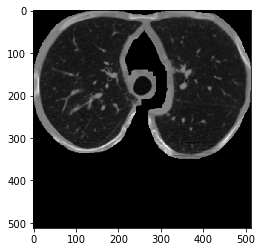

0.00367802 12


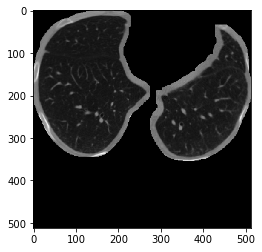

0.0070291 13


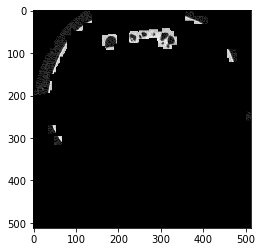

0.0692327 14


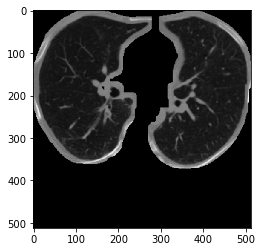

0.00392613 15


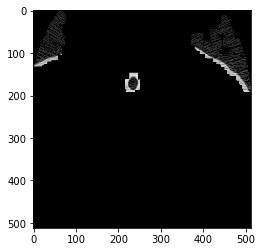

0.0433057 16


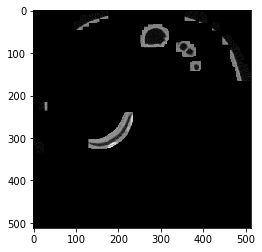

0.0702556 17


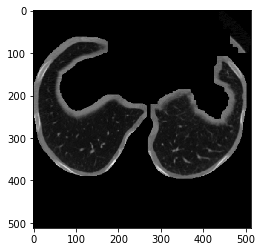

0.0212601 18


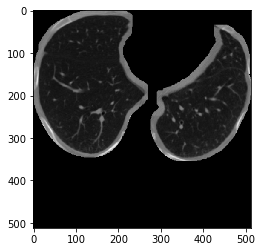

0.00678684 19


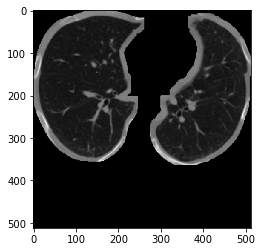

0.00514207 20


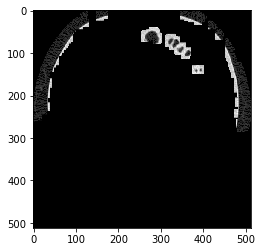

0.0614186 21


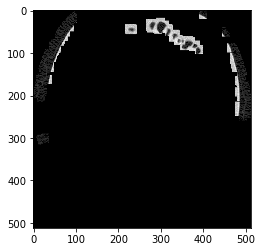

0.06062 22


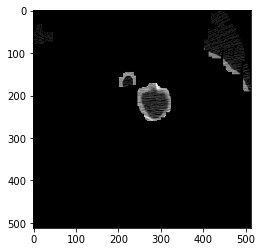

0.0487319 23


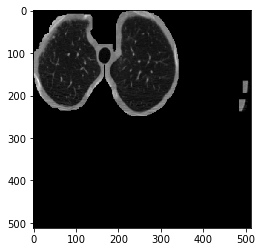

0.0197867 24


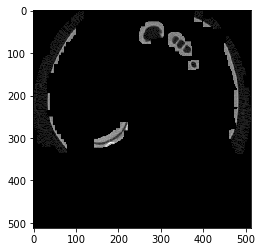

0.0648698 25


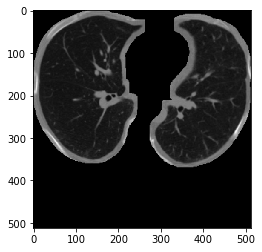

0.00473525 26


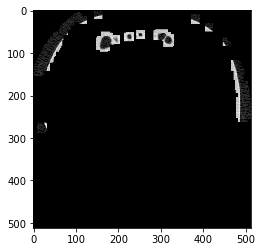

0.063861 27


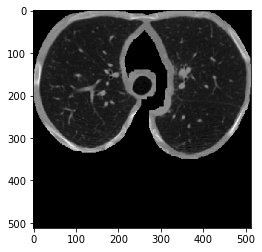

0.00301971 28


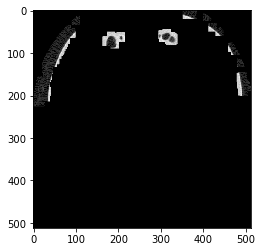

0.0684648 29


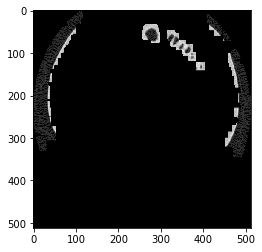

0.0604448 30


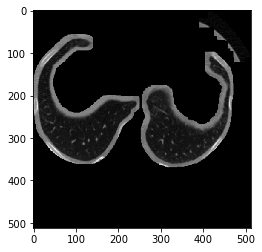

0.0252551 31


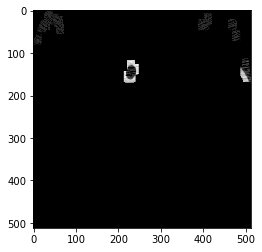

0.0315203 32


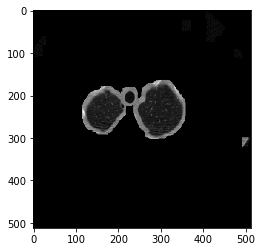

0.0671748 33


KeyboardInterrupt: 

In [52]:
#read dsbowl data
#need to put it through preprocessing...
#predict
import cancer_utils
import tqdm
pred_list=[]
for i in (range(len(e))):
    dc = dicom.read_file(e[i])
    img = dc.pixel_array
    img[img == -2000] = 0
    preprocessed_img=cancer_utils.full_preprocess_img(img)
    preprocessed_img_2,_=cancer_utils.preprocess_2(img,preprocessed_img,img) #the last image is dummy
    #plt.imshow(preprocessed_img_2,cmap='gray')
    #plt.show()
    preprocessed_img_2=np.expand_dims(np.expand_dims(preprocessed_img_2,0),0)
    preds=model.predict(preprocessed_img_2)
    pred_list.append(preds)
    sum=np.sum(preds)
    if sum>0:
        print (sum,i)
    if i % 100 ==0:
        print(i)

In [53]:
#save what we have

SyntaxError: invalid syntax (classify_nodes.py, line 114)